# Gaston 與 Plots 之首次載入執行時間比較

2020 04 23 

JingYu Ning

## 在 Julia 中繪圖

在 Julia 中，不乏有許多不錯的繪圖套件，例如 [Plots.jl](https://github.com/JuliaPlots/Plots.jl) 或是 [Gadfly.jl](https://github.com/GiovineItalia/Gadfly.jl)。這些繪圖套件設計優良且功能強大，且得益於 Julia 的 JIT 使得這些套件能擁有絕佳的執行時間。然而 Julia JIT 會在引用（`using`）套件時對程式碼編譯，而引發冗長的載入時間。對於上述的情形我們可以使用 [PackageCompiler.jl](https://github.com/JuliaLang/PackageCompiler.jl) 來將套件預先編譯成 system image 以減少每次重新載入套件的編譯時間。作法參考[這篇文章](https://yuehhua.github.io/2020/04/10/compile-julia-package/)。

而另一方面， [Gaston](https://github.com/mbaz/Gaston.jl) 使用 [Gnuplot](http://www.gnuplot.info/) 當作後端，則有顯著的性能優勢。

### 下面是一個概略的比較

#### 宣告資料

In [1]:
x = 0:0.0001:6;
y1 = sin.(x);
y2 = cos.(x);

#### Plots.jl 的繪圖時間

Plots.jl 的繪圖時間:  17.781974 seconds (28.07 M allocations: 1.383 GiB, 3.33% gc time)


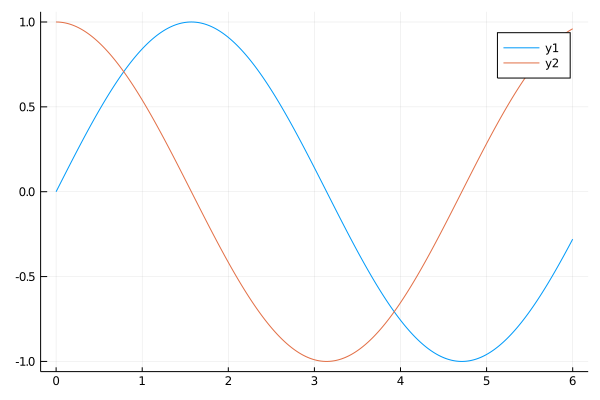

In [2]:
print("Plots.jl 的繪圖時間: ")
@time begin 
    using Plots
    p = Plots.plot(x, y1)
    p = Plots.plot!(p, x, y2)
end

#### Gaston.jl 的繪圖時間

Gaston.jl 的繪圖時間:   1.211825 seconds (2.32 M allocations: 118.780 MiB, 2.97% gc time)


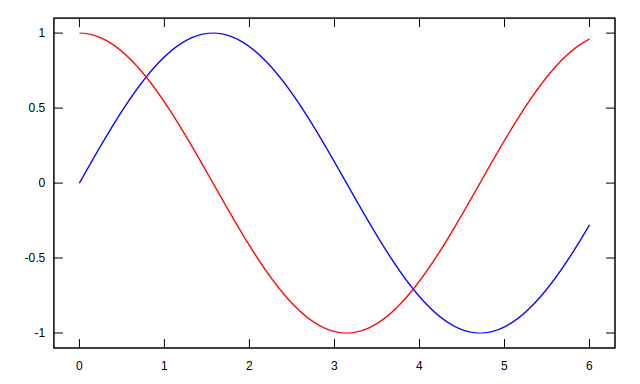

In [3]:
print("Gaston.jl 的繪圖時間: ")
@time begin 
    using Gaston
    p = Gaston.plot(x, y1)
    p = Gaston.plot!(x, y2)
end

### JIT 後所需時間

In [4]:
using BenchmarkTools

#### Plots.jl 的繪圖時間

Plots.jl 的繪圖時間:   1.372 ms (9781 allocations: 751.93 KiB)


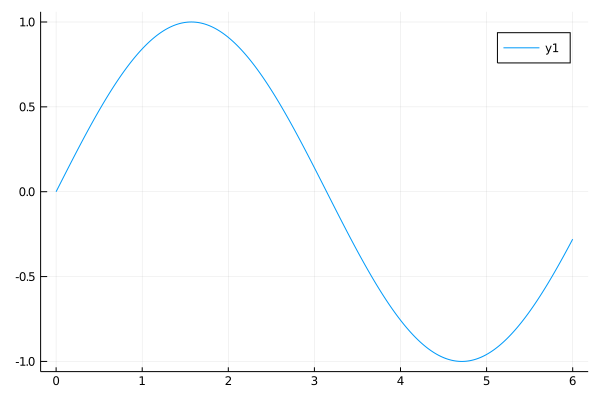

In [5]:
print("Plots.jl 的繪圖時間: ")
@btime Plots.plot(x, y1)

#### Gaston.jl 的繪圖時間

Gaston.jl 的繪圖時間:   5.280 μs (31 allocations: 1.94 KiB)


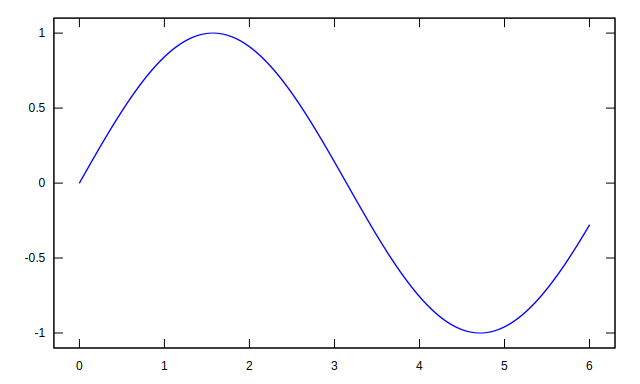

In [6]:
print("Gaston.jl 的繪圖時間: ")
@btime Gaston.plot(x, y1)